In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from scipy.optimize import curve_fit
%matplotlib inline

In [3]:
zarzenie = pd.read_csv("zarzenie.csv", sep=', ',engine='python')
matplotlib.rc('font', family='Comic Sans MS')
e = ladunek_elementarny = -1.60218e-19
kB = staly_boltzmann = 1.38064e-23
me = masa_elektronu = 9.10938e-31
zarzenie

,Ua1[mV],Ia1[miA],Ua2[mV],Ia2[miA]
0,-0.0,15,-0.7,150
1,-10.2,14,-14.3,140
2,-16.9,13,-30.2,130
3,-24.9,12,-47.2,120
4,-32.9,11,-63.5,110
5,-42.4,10,-79.5,100
6,-51.9,9,-98.3,90
7,-63.7,8,-116.5,80
8,-75.0,7,-136.4,70
9,-89.3,6,-157.8,60


In [4]:
def proporcja(x,a):
    return a*x

Seria 1 a = 0.0101338976253 delta_a = 1.73153249129e-08
Seria 2 a = 0.0056398191481 delta_a =  1.43178403327e-08


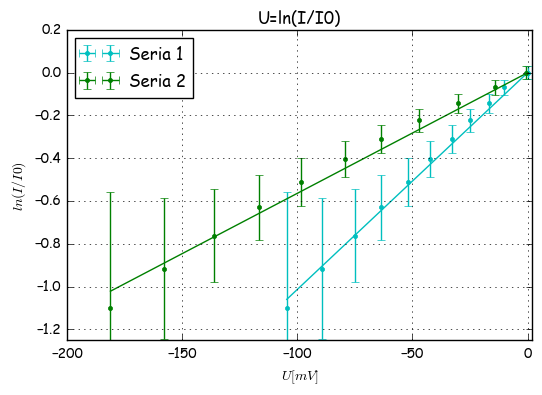

In [5]:
# seria 1 Iz = 0.448A
prad1 = zarzenie['Ia1[miA]']
delta_prad1 = 15*0.015
prad10 = 15
napiecie1 = zarzenie['Ua1[mV]']
y1 = np.log(prad1/prad10)
delta_y1 = 15*0.015*prad10/prad1*np.sqrt((prad1+prad10)**2/prad1**4)
plt.errorbar(napiecie1, y1, delta_y1, 0, 'c.', label='Seria 1')
parametry1, kowariancja1 = curve_fit(proporcja,napiecie1,y1)
plt.plot(napiecie1, napiecie1*parametry1[0],'c',label='_prosta 1')
# seria 2 Iz = 0.528A
prad2 = zarzenie['Ia2[miA]']
delta_prad2 = 150*0.015
prad20 = 150
napiecie2 = zarzenie['Ua2[mV]']
y2 = np.log(prad2/prad20)
delta_y2 = 150*0.015*prad20/prad2*np.sqrt((prad2+prad20)**2/prad2**4)
plt.errorbar(napiecie2, y2, delta_y2, 0, 'g.', label='Seria 2')
parametry2, kowariancja2 = curve_fit(proporcja,napiecie2,y2)
plt.plot(napiecie2, napiecie2*parametry2[0],'g', label='_prosta 2')
# Reszta wykresu
plt.xlim(-200,2)
plt.ylim(-1.25,0.2)
plt.grid()
plt.legend(loc='upper left')
plt.title('U=ln(I/I0)')
plt.xlabel(r'$U[mV]$'); plt.ylabel(r'$ln(I/I0)$')
plt.savefig('zarzenie.png')
print('Seria 1 a =',parametry1[0,],'delta_a =',kowariancja1[0,0])
print('Seria 2 a =',parametry2[0,],'delta_a = ', kowariancja2[0,0])

In [6]:
#wersja  robocza
temperatura1 = -e/kB/parametry1[0]/1000
delta_temperatura1 = -(kowariancja1[0,0]/parametry1[0]**2)*e/kB/1000
temperatura2 = -e/kB/parametry2[0]/1000
delta_temperatura2 = -(kowariancja2[0,0]/parametry2[0]**2)*e/kB/1000
print("Seria 1: T = ", temperatura1, "niepewność = ", delta_temperatura1)
print("Seria 2: T = ", temperatura2, "niepewność = ", delta_temperatura2)

Seria 1: T =  1145.12881195 niepewność =  0.00195662894763
Seria 2: T =  2057.62238883 niepewność =  0.00522369743687


In [7]:
def IU(U,Ia0,C):
    return Ia0*np.exp(U*C)
def antykwadrat(zU,Ia0,C):
    return Ia0*np.exp(zU**2*C)


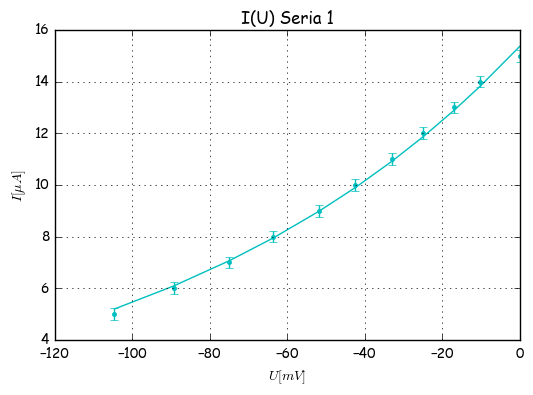

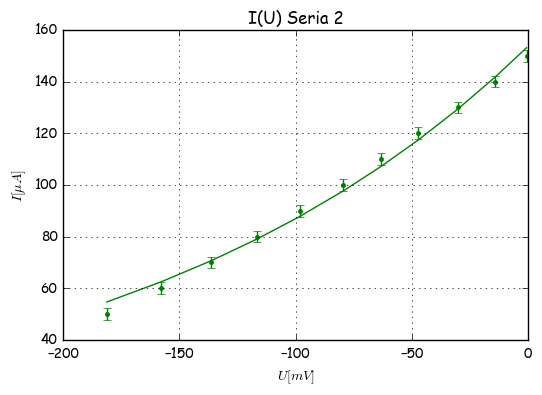

In [8]:
plt.title('I(U) Seria 1')
plt.xlabel(r'$U[mV]$'); plt.ylabel(r'$I[\mu A]$')
plt.grid()
plt.errorbar(napiecie1,prad1,delta_prad1,0,'c.')
exponans1, warancja_exponans1 = curve_fit(IU,napiecie1,prad1)
plt.plot(napiecie1,exponans1[0]*np.exp(exponans1[1]*napiecie1),'c')
plt.savefig('zarzenieU1.png')
plt.show()
plt.title('I(U) Seria 2')
plt.xlabel(r'$U[mV]$'); plt.ylabel(r'$I[\mu A]$')
plt.grid()
plt.errorbar(napiecie2,prad2,delta_prad2,0,'g.')
exponans2, warancja_exponans2 = curve_fit(IU,napiecie2,prad2)
plt.plot(napiecie2,exponans2[0]*np.exp(exponans2[1]*napiecie2),'g')
plt.savefig('zarzenieU2.png')

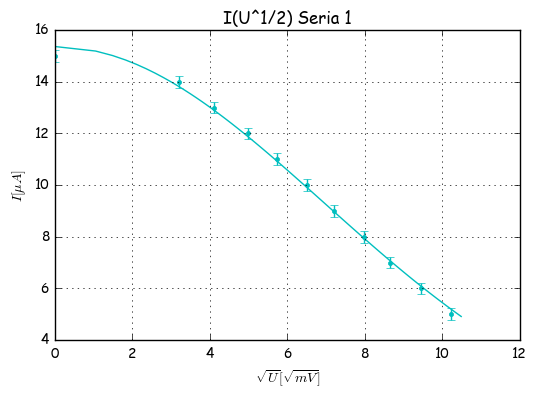

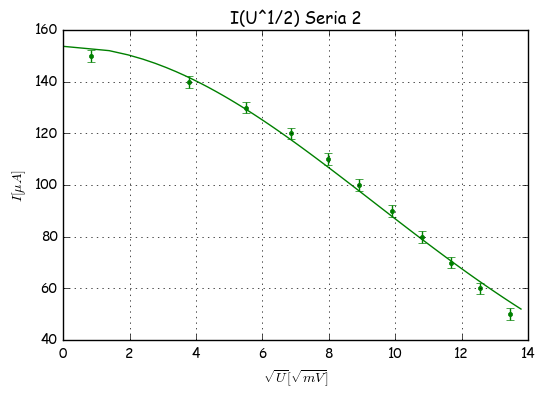

In [13]:
linka1 = np.linspace(0,110,100)
linka2 = np.linspace(0,190,100)
plt.title('I(U^1/2) Seria 1')
plt.xlabel(r'$\sqrt{U}[\sqrt{mV}]$'); plt.ylabel(r'$I[\mu A]$')
plt.grid()
plt.errorbar((-napiecie1)**(1/2),prad1,delta_prad1,0,'c.')
c_fit, lnIo_fit = np.polyfit((-napiecie1), np.log(prad1), 1, cov=False)
Io_fit = np.exp(lnIo_fit)
plt.plot((linka1)**0.5,exponans1[0]*np.exp(exponans1[1]*(-linka1)),'c')
plt.savefig('zarzenieU12.png')
plt.show()
plt.title('I(U^1/2) Seria 2')
plt.xlabel(r'$\sqrt{U}[\sqrt{mV}]$'); plt.ylabel(r'$I[\mu A]$')
plt.grid()
plt.errorbar((-napiecie2)**(1/2),prad2,delta_prad2,0,'g.')
plt.plot((linka2)**0.5,exponans2[0]*np.exp(exponans2[1]*(-linka2)),'g')
plt.savefig('zarzenieU22.png')

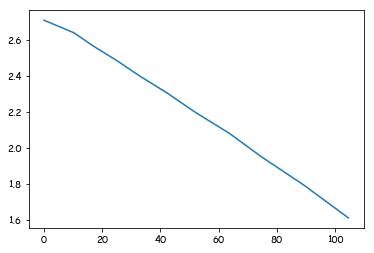

In [74]:
plt.plot((-napiecie1), np.log(prad1))
# plt.plot((-napiecie1)**0.5,antykwadrat(-napiecie1, Io_fit, c_fit))


In [67]:
-napiecie1

0       0.0
1      10.2
2      16.9
3      24.9
4      32.9
5      42.4
6      51.9
7      63.7
8      75.0
9      89.3
10    104.6
Name: Ua1[mV], dtype: float64

In [27]:
antykwadrat

array([ 1.,  1.])